# Assignment 4: Machine Learning and Prediction

For this assignment, we use a data set obtained from the UC Irvine Machine Learning Repository, which contains information related to a direct marketing campaign of a Portuguese banking institution and its attempts to get its clients to subscribe for a term deposit.

The data is available at: `https://github.com/mgt412/course_notebooks/blob/master/Datasets/A4_bank-full_v2.csv?raw=true`.

|   Variable	| Description  	|  Type 	|
|---	|---	|---	|
| `age`  	| Client age  	| Numeric  	|
|  `job` 	| Occupation of client  	| Categorical  |
| `marital`  	| Marital status   	| Categorical  	|
| `education`  	| Education level  	| Categorical   	|
| `default`  	| Client has credit in default?  	| Categorical  |
| `housing`  	| Client has housing loan?  	| Categorical  |
| `loan`  	| Client has personal loan?  	|  Cateorical 	|
|  `contact` 	| Contact communication  	| Categorical  	|
|  `month` 	|  Month that last contact was made 	|  Categorical 	|
|  `day_of_week` 	| Day that last contact was made  	| Categorical  	|
|  `duration` 	|  Duration of last contact in seconds 	| Numeric  	|
|   `campaign`	|  Number of contacts performed during this campagin for the client 	| Numeric  	|
|   `pdays`	|  Number of days since client was contacted in previous campagin 	|  Numeric  	|
|  `poutcome` 	|  Outcome of previous marketing campagin  	| Categorical  	|
| `y` | **Outcome of this campaign: Client has subscribed for a term deposit?** | Binary (Yes or No) |


Your main task is to build a **logistic regression** model to predict which variables predict whether clients subscribe or not for a term deposit.

1. Many variables are categorical (e.g., `job` is either `admin`, `blue-collar`, `entrepreneur`, etc.). Since you cannot use them in regressions, you need to create dummy variables for each categorical value of each variable. For example, the processed dataset will contain a column `job_admin` taking value 1 if the job is admin, and zero else.

2. Estimate the logistic regression on the first half of the data set (training sample). Report the estimated coefficients, comment briefly on the sign of coefficients (choose one or two variables to comment on.)

3. Test your model on the second half of the data set. Plot the Receiver Operating Characteristic curve and compute the AUC. How good is your predictive power?

## Loading the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

In [2]:
url='https://github.com/mgt412/course_notebooks/blob/master/Datasets/A4_bank-additional-full_v2.csv?raw=true'
data=pd.read_csv(url)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


## Building dummies

In [57]:
key_col='job'

data['outcome']=np.where(data['y']=='yes',1,0)

categorical_vars=['job','marital','education','default','housing','loan','contact','month',
                 'day_of_week','poutcome']

def categorical_dummmies(key_col):
    list_vars=data[key_col].drop_duplicates().tolist() # list of categories

    for item in list_vars:
        data[key_col+"_"+item]=np.where(data[key_col]==item,1,0) # generate dummies
    del data[key_col] # delete the original values
    return data
    
for var in categorical_vars:
    data=categorical_dummmies(var)
    
del data['y']

In [58]:
data.head()

,age,duration,campaign,pdays,previous,outcome,job_housemaid,job_services,job_admin.,job_blue-collar,...,month_apr,month_sep,day_of_week_mon,day_of_week_tue,day_of_week_wed,day_of_week_thu,day_of_week_fri,poutcome_nonexistent,poutcome_failure,poutcome_success
0,56,261,1,999,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


## Split the data into training and testing samples

In [59]:
train=data.loc[:len(data)/2-1]
test=data.loc[len(data)/2:]

In [60]:
# check whether samples are balanced
len(train), len(test), len(data)

(20594, 20594, 41188)

## Estimate the Logistic Regression

In [61]:
y_train=train['outcome'] # dependent variable, i.e., outcome
X_train = train.drop('outcome', 1)

# create an instance of logistic regression
lgstc_reg =  LogisticRegression(solver='newton-cg')    

# fit training data on logistic regression 
lgstc_reg.fit(X_train, y_train)

# print coefficients
print(lgstc_reg.intercept_, lgstc_reg.coef_)     

[-4.12464298e-05] [[-3.43439353e-03  5.56902429e-03 -1.75063113e-02 -5.40835243e-03
   0.00000000e+00 -4.82492763e-01  1.65631589e-01 -3.67045628e-02
   8.33511569e-02 -3.92772558e-02  2.79513994e-01  1.97943578e-01
  -1.60956136e-02 -3.92948714e-01  2.60391059e-01  6.41614394e-02
  -8.34793209e-02 -2.78361719e-01 -1.79658013e-01 -2.38134121e-01
   6.96148440e-01 -1.06926991e-01  9.91047158e-02  1.11799424e-01
   7.97298627e-02  2.45475499e-01 -1.01448943e-01  1.64741777e-01
  -4.92480758e-01 -2.47401631e-02  2.47347493e-02  0.00000000e+00
   1.50247162e-01  1.11392710e-01 -2.61645286e-01  1.47855271e-01
   1.13784601e-01 -2.61645286e-01 -3.09502162e-01  3.09496749e-01
  -3.82172194e-01  1.77013158e-01 -1.31381380e-01  3.36535002e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.74052957e-02 -1.22630502e-01
   1.06278426e-01 -1.87882746e-01  1.66824112e-01 -5.41376602e-06
   0.00000000e+00  0.00000000e+00]]


### To see the coefficients easier, we put them in a `DataFrame`.

In [64]:
coeffs=pd.DataFrame()
coeffs['variable']=X_train.columns.tolist()
coeffs['coefficient']=lgstc_reg.coef_[0]
coeffs.sort_values(by='variable').head()

,variable,coefficient
0,age,-0.003434
2,campaign,-0.017506
39,contact_cellular,0.309497
38,contact_telephone,-0.309502
54,day_of_week_fri,0.166824


## Plot the ROC curve

AUC for predictive model:  0.5
AUC for random model:  0.8258795534530691
AUC for perfect model:  1.0


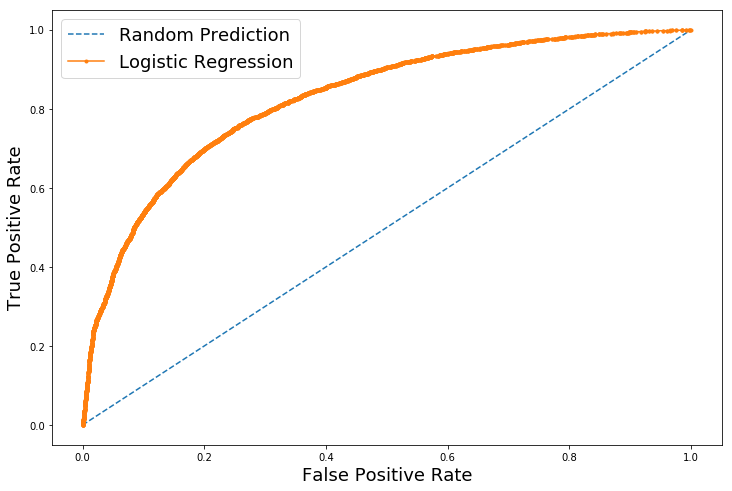

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test=test['outcome'] # dependent variable, i.e., outcome
X_test = test.drop('outcome', 1)

## PREDICTED SUCCESS PROBABILITIES
lr_prob=lgstc_reg.predict_proba(X_test) # return probability of outcome "0", respectively outcome "1"
lr_prob=lr_prob[:, 1] # keep only the probability of outcome 1

# compute AUC score for predictive model
lr_auc=roc_auc_score(y_test,lr_prob) 
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob) # ROC curve for predictive model


## An uninformative model: always predict default 

ns_prob=[0 for _ in range(len(y_test))] # a "dummy" model: predict outcome 0 (default), regardless.
ns_auc=roc_auc_score(y_test,ns_prob) # compute AUC score for random model
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob) # ROC curve for random model

## A perfect model: predict default only when it has happened (hindsight!)

hind_prob=y_test
hind_auc=roc_auc_score(y_test,hind_prob)
hind_fpr,hind_tpr,_=roc_curve(y_test,hind_prob) # ROC curve for random model

print("AUC for predictive model: ",ns_auc)
print("AUC for random model: ",lr_auc)
print("AUC for perfect model: ",hind_auc)


plt.figure(figsize=(12,8))

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Prediction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')
#plt.plot(hind_fpr,hind_tpr,marker='.',label='Perfect Prediction')

plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.legend(fontsize=18)
plt.show()